# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In order to select customers that vary significantly from one another as suggested, I will focus on sample data points above the 75th percentile in: annual spending on fresh products (that is, above 16933.75); annual spending on milk products (that is, above 7190.50); and annual spending on grocery products (that is, above 10655.75).

In [3]:
fresh_75th_percentile = data.describe().loc['75%', 'Fresh']
milk_75th_percentile = data.describe().loc['75%', 'Milk']
grocery_75th_percentile = data.describe().loc['75%', 'Grocery']

print "Customers with annual spending on fresh products above the 75th percentile:"
display(data.loc[data.Fresh > fresh_75th_percentile, :].head())

print "Customers with annual spending on milk products above the 75th percentile:"
display(data.loc[data.Milk > milk_75th_percentile, :].head())

print "Customers with annual spending on grocery products above the 75th percentile:"
display(data.loc[data.Grocery > grocery_75th_percentile, :].head())

Customers with annual spending on fresh products above the 75th percentile:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,22615,5410,7198,3915,1777,5185
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168
18,18601,6327,10099,2205,2767,3181


Customers with annual spending on milk products above the 75th percentile:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
5,9413,8259,5126,666,1795,1451
9,6006,11093,18881,1159,7425,2098


Customers with annual spending on grocery products above the 75th percentile:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
9,6006,11093,18881,1159,7425,2098
10,3366,5403,12974,4400,5977,1744
12,31714,12319,11757,287,3881,2931
13,21217,6208,14982,3095,6707,602
14,24653,9465,12091,294,5058,2168


From the indices above, I will choose indices 12 (because this customer spends a lot on fresh products), 0 (because this customer spends a lot on milk products) and 9 (because this customer spends a lot on grocery products).

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 9, 12]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,6006,11093,18881,1159,7425,2098
2,31714,12319,11757,287,3881,2931


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

In order to answer Question 1, I will visualize the chosen samples as bars and compare them with the means from the whole dataset.

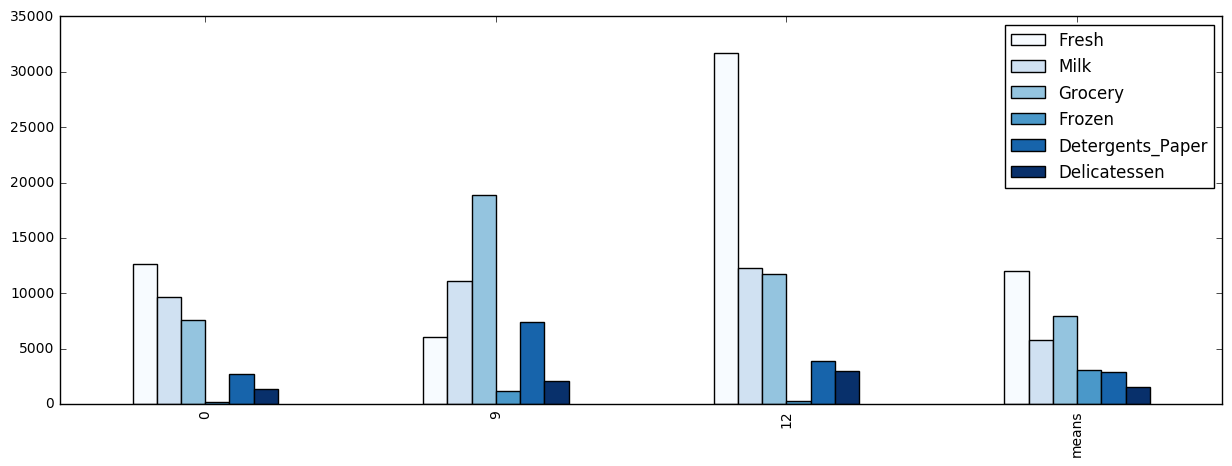

In [5]:
means = data.describe().loc['mean', :]
bars = samples.append(means)
bars.index = indices + ['means']
bars.plot(kind = 'bar', figsize = (15, 5), cmap = 'Blues')

I will also visualize a heatmap to analyse samples' percentiles.

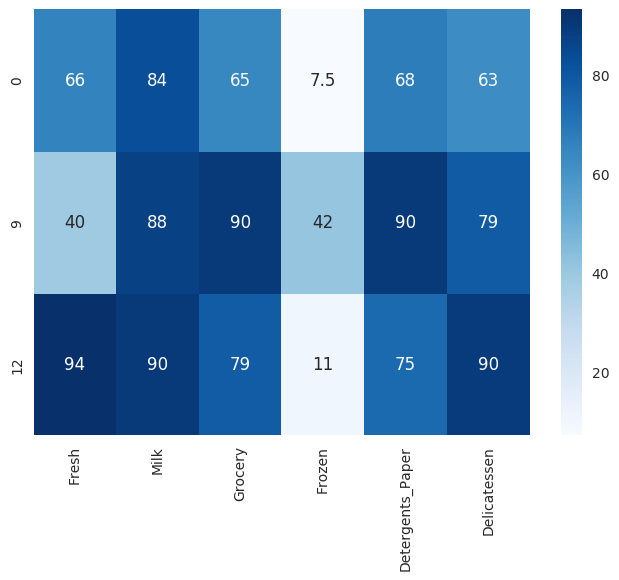

In [6]:
import seaborn as sns
percentiles = data.rank(pct = True) * 100
sns.heatmap(percentiles.iloc[indices], annot = True, cmap = 'Blues')

**Answer:** Considering that customer 0 has low spending only on Fronzen and has a considerable spending on Milk, I think it can be a medium scale cafeteria. Because customer 9 has relative low spending on Frozen and Fresh food (their spending with these features are near the median, that's why relative) and spends a lot on everything else, my guess is that it is a medium/large establishment focused on pies, cakes and possibly ice cream. Since customer 12 has low spending only on Frozen food and spends more than at least 75% of the other customers on all the other categories, I believe it is a large food retailer that avoid business with frozen food.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

features = list(data.columns)

for feature in features:
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis = 1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.25, random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print "Score when dropping {}: {}".format(feature, score)

Score when dropping Fresh: -0.385749710204
Score when dropping Milk: 0.156275395017
Score when dropping Grocery: 0.681884008544
Score when dropping Frozen: -0.210135890125
Score when dropping Detergents_Paper: 0.271666980627
Score when dropping Delicatessen: -2.2547115372


C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** I tried to make a deep analysis and answer this question by predicting all features with a loop and comparing the resulting scores. All the features with negative R^2 scores (Fresh, Frozen and Delicatessen) are necessary for identifying spending habits, because they contain unique information and the other features cannot explain the variation in them. Milk and Detergents_Paper R^2 scores are positive but very low (if compared with Grocery R^2 score), which indicates they are possibly necessary features for identifying spending habits. Grocery R^2 score is the highest (0.681884008544), and if I wanted to remove a feature, it should be it (the relative high R^2 score suggests it does not contain relevant information and may not be necessary for indentifying customers' spending habits).

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

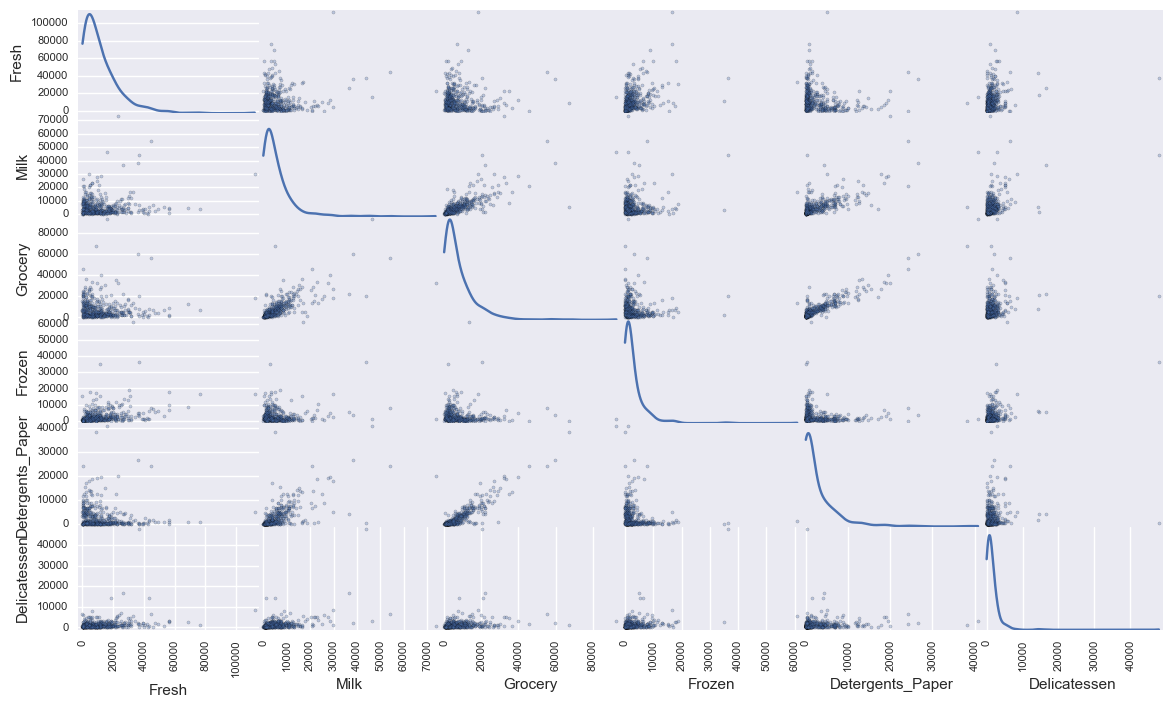

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

In order to answer Question 3, I will visualize a heatmap to analyse features correlation and compare it with the scatter matrix.

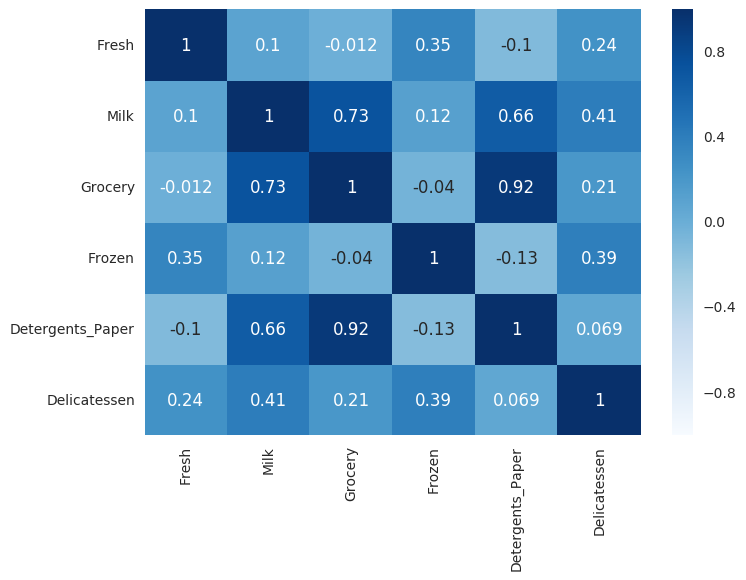

In [9]:
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = 'Blues')

**Answer:** From the scatter matrix, I could see a very strong correlation between Grocery and Detergents_Paper, and that was confirmed by the heatmap above (they have a correlation of .92). Although it was hard for me to see in the scatter matrix the correlation between Milk and Grocery and between Milk and Detergents_Paper, the heatmap helped me to state with some security that there is correlation between these pairs of features (.73 and .66, respectively). These correlations confirm my suspicious: features with positive R^2 score are strongly correlated. It is important to notice that the feature with the highest R^2 score, Grocery, has high correlation with both Detergents_Paper and Milk. The data is not normally distributed because there are many outliers; most of the data lies to the left, which indicates most of the customers in the dataset does not spend huge amounts of money while a few of them spend a lot.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

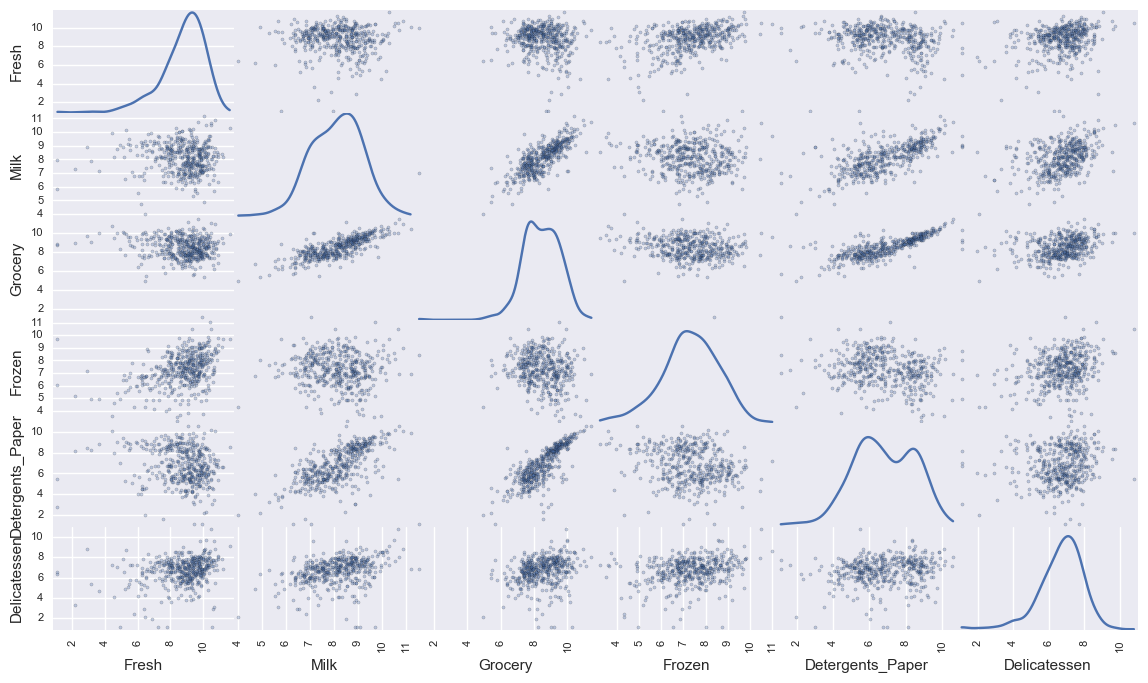

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740
2,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099


Below I plotted two heatmaps to compare correlations in data and in log_data.

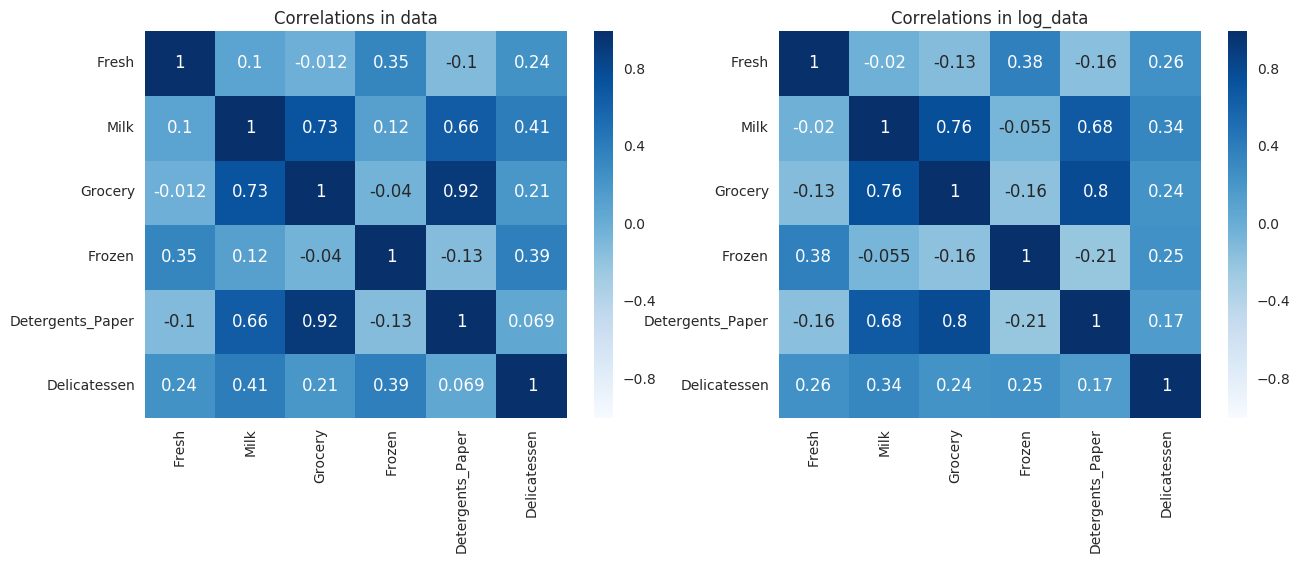

In [12]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

ax1.set_title("Correlations in data")
heatmap_data = sns.heatmap(correlations, annot = True, cmap = 'Blues', ax = ax1)

correlations_log_data = log_data.corr()
ax2.set_title("Correlations in log_data")
heatmap_log_data = sns.heatmap(correlations_log_data, annot = True, cmap = "Blues", ax = ax2)

From the two heatmaps above, I think it is important to notice the following: correlation between Grocery and Detergents_Paper decreases 13% from data to log_data; correlation between Milk and Grocery increases 4% from data to log_data; correlation between Milk and Detergents_Paper increases 3% from data to log_data.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
from collections import Counter
counter = Counter()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    outliers_customers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print "Data points considered outliers for the feature '{}':".format(feature)
    print outliers_customers.index.values
    print ""
    # display(outliers_customers)
    counter.update(outliers_customers.index.values)

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [outlier[0] for outlier in counter.items() if outlier[1] > 1]
print("Customers considered outlier for more than one feature: {}\n".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Original data had {} samples.".format(data.shape[0]))
print("New data has {} samples.".format(good_data.shape[0]))

Data points considered outliers for the feature 'Fresh':
[ 65  66  81  95  96 128 171 193 218 304 305 338 353 355 357 412]

Data points considered outliers for the feature 'Milk':
[ 86  98 154 356]

Data points considered outliers for the feature 'Grocery':
[ 75 154]

Data points considered outliers for the feature 'Frozen':
[ 38  57  65 145 175 264 325 420 429 439]

Data points considered outliers for the feature 'Detergents_Paper':
[ 75 161]

Data points considered outliers for the feature 'Delicatessen':
[ 66 109 128 137 142 154 183 184 187 203 233 285 289 343]

Customers considered outlier for more than one feature: [128, 154, 65, 66, 75]

Original data had 440 samples.
New data has 435 samples.


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are five outliers for more than one feature based on Tukey's method (their indices are 65, 66, 75, 128 and 154). For me, they should be removed from the dataset because they are outliers in more than one features. I think outliers should be removed from the dataset because they can affect the result of the prediction.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

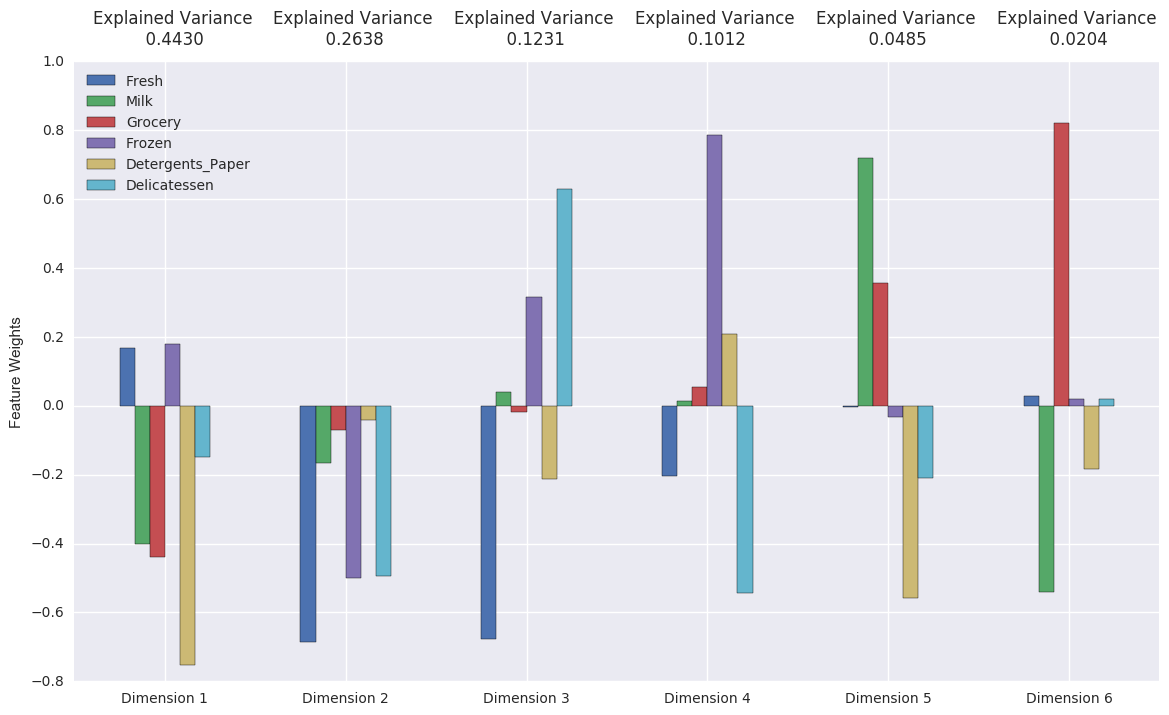

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The first two principal components explain 70.68% of the variance in the data (.4430 + .2638). The first four principal components explain 93.11% of the variance in the data (.4430 + .2638 + .1231 + .1012). As we can see above, Milk, Grocery and Detergents_Paper are the most important features for the first principal component (I expected this because they are highly correlated). For the second principal component, the other features (Fresh, Frozen and Delicatessen) were the most important. These three features are also very important for the third principal component. Frozen and Delicatessen are the most important features for the fourth principal component.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [15]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7580,0.0097,-0.9590,-1.6824,0.268,-0.3891
1,-2.8734,-0.6774,0.1330,-0.1802,-0.025,0.1224
2,-2.2406,-1.2419,-1.0729,-1.9589,0.216,-0.1782


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [16]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [17]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7580,0.0097
1,-2.8734,-0.6774
2,-2.2406,-1.2419


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

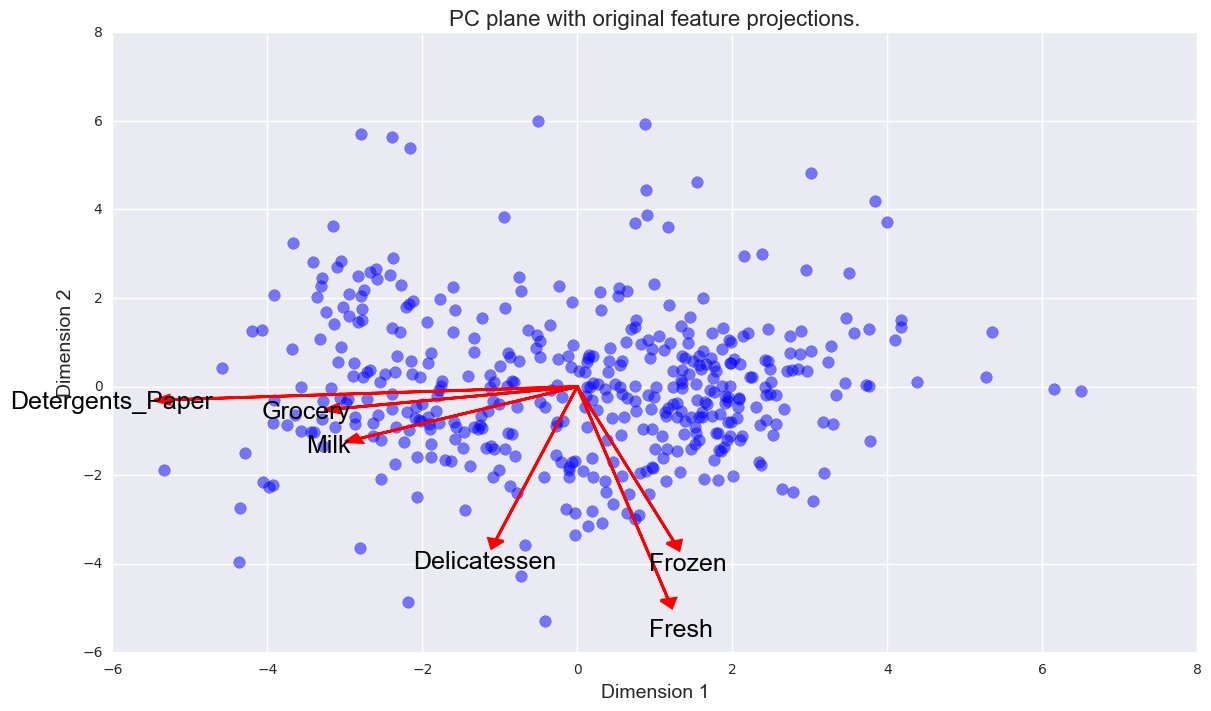

In [18]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

Detergents_Paper, Grocery and Milk are the features that are most correlated with the first component, because their projections are close to the x axis (horizontal line). The other three features (Delicatessen, Fresh and Frozen) are correlated with the second component, because their projections are close to the y axis (vertical line). These observations agrees with the pca_results plotted earlier.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** The advantages to using K-Means algorithm is that it is much faster than Gaussian Mixture Model clustering algorithm and is easier to understand (clustering of samples is done by minimizing the Euclidian distance between the sample and the group's center). The advantage to using Gaussian Mixture Model algorithm is that it is more flexible than K-Means algorithm (it assumes a sample can belong to more than one group and uses probability to determine the most probable cluster). I will use Gaussian Mixture Model algorithm because the dataset is not too large (435 sammples and 6 features).

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for number_of_clusters in range(2, 7):
    # TODO: Apply your clustering algorithm of choice to the data 
    clusterer = GaussianMixture(n_components = number_of_clusters, random_state = 42)
    clusterer.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    #clustering_score = clustering_score(reduced_data, number_of_clusters)
    print("Score for {} clusters: {}".format(number_of_clusters, round(score, 4)))

Score for 2 clusters: 0.4219
Score for 3 clusters: 0.4042
Score for 4 clusters: 0.2933
Score for 5 clusters: 0.3005
Score for 6 clusters: 0.3261


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** I calculated the silhouette score for 2 to 6 clusters. As we can see above, the highest silhouette score is obtained with 2 clusters (.4219).

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

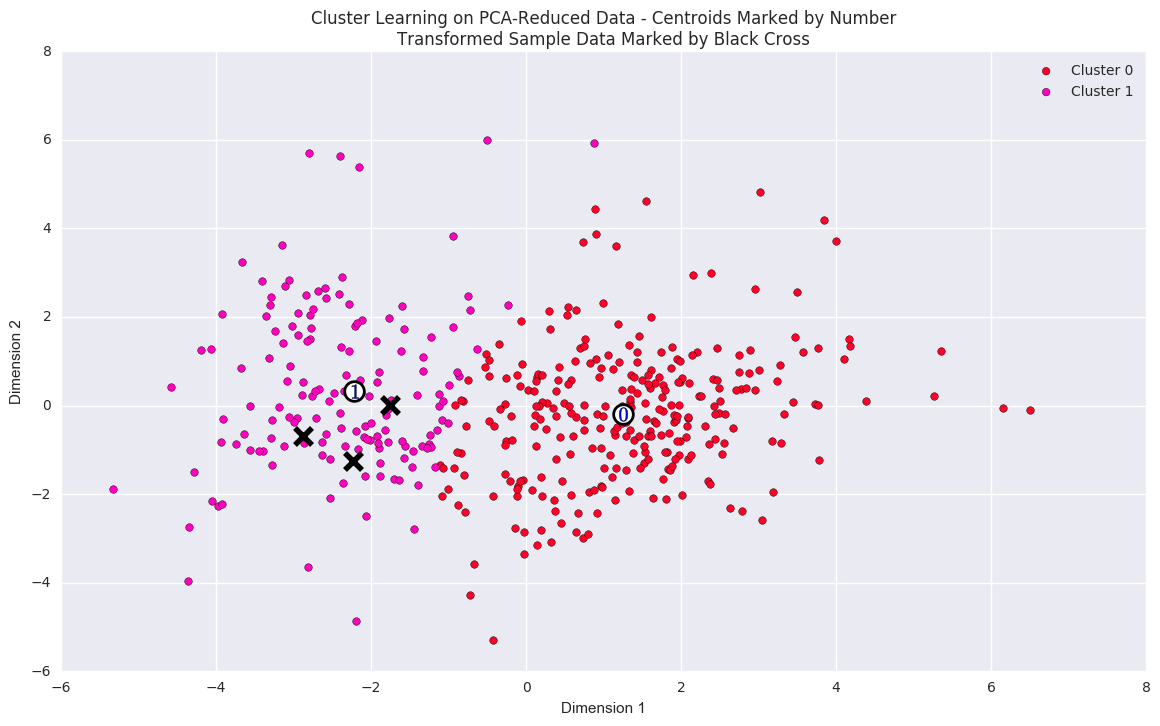

In [20]:
clusterer = GaussianMixture(n_components = 2, random_state = 42)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

In [22]:
auxiliar_df = true_centers.transpose()

means = data.describe().loc['mean', :]
auxiliar_df['Means'] = means

medians = data.describe().loc['50%', :]
auxiliar_df['Medians'] = medians

display(auxiliar_df)

,Segment 0,Segment 1,Means,Medians
Fresh,8953.0,3552.0,12000.297727,8504.0
Milk,2114.0,7837.0,5796.265909,3627.0
Grocery,2765.0,12219.0,7951.277273,4755.5
Frozen,2075.0,870.0,3071.931818,1526.0
Detergents_Paper,353.0,4696.0,2881.493182,816.5
Delicatessen,732.0,962.0,1524.870455,965.5


**Answer:** As we can see above, using means to try to guess the set of establishments each segment represents is not the best thing to do, since there are a lot of outliers in the dataset. That said, I used medians to answer this. Segment 0 spends more than the median with only Fresh and Frozen food, which indicates, in my opinion, that it can represent restaurants, cafeterias and small establishments in general. Segment 1 spends more than the median with Milk, Grocery and Detergents_Paper, and a close amount with Delicatessen, and that indicates, in my opinion, that it can represent large establishments, such as retail stores.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** All the samples are predict to be in Cluster 1 (retail stores). This means I was right in all my earlier guesses (question 1).

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** If I had to determine how a customer would react to the change in delivery service, I would first extract two random groups from each one of the segments: groups A and B from cluster 0, and groups C and D from cluster 1. After that, I would change the delivery service to 3 days a week for the groups A and C, and keep the delivery service of 5 days a week for the groups B and D. After one month, I would do a satisfaction survey with all the clients in these four groups and compare the results of the groups in the same segment. I think only after the survey it would be possible to determine securely if a whole segment would be affected by the change in the delivery service. That said, although we can assume, for example, that customers with small storage departaments would not be satisfied with the change and that customers with a considerable storage capacity would not mind at all, I think that running an A/B test before making any decision is crucial for the wholesale distributor.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The wholesale distributor could use the clustering algorithm it used to distinguish clusters, or it could use a supervised learning algorithm to learn the best way to distinguish the segments (the target variable would be the clusters).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

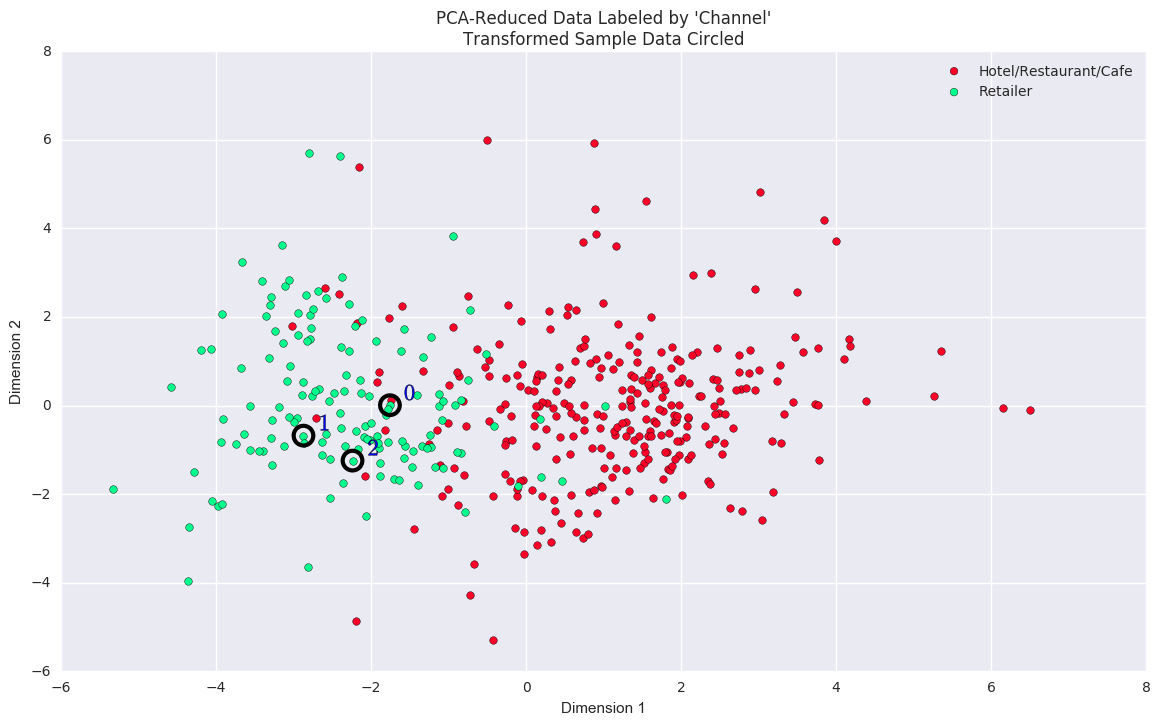

In [24]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm and number of clusters I've chosen seems to perform very well, since the highest silhouette score was for 2 clusters and the data is divided in two segments (Hotel/Restaurant/Cafe and Retailer). The clustering results displayed above show a "confusing" division of clusters, since the limits of each cluster aren't very clear. Besides that, I would consider these classifications as consistent with my previous definition of the customer segments.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.